# **Recherche en grille** : `USEVectorizer`

# Chargement des corpus prétraités

In [1]:
from tx_pipeline import tx_ml_preprocess
from tx_pipeline import tx_ml_use
from gridsearch import flipkart_gridsearch
from pepper_utils import cls
import matplotlib.pyplot as plt

names = ['product_name', 'description']
corpora = {}
for name in names:
    corpora[name] = tx_ml_preprocess(name)

# Réglages mono-paramètre

In [4]:
corpus_name = "product_name"
pipeline = tx_ml_use
ex_params_name = 'use_params'
# 'max_length': 64,  # Max of 512 with bert-base-uncased (hidden_size)
# 'batch_size': None,  # `None` means no batch
ex_param_domain_defs = {"batch_size": (int, 1, 150, 150)}
gridsearch_data, _ = flipkart_gridsearch(
    pipeline, corpora, corpus_name,
    ex_params_name, ex_param_domain_defs,
    verbosity=2,
    include_fixed=["max_length", "batch_size"]
)
cls()
display(gridsearch_data)

,batch_size,n_docs,n_sents,n_feats,n_rd_feats,ari,comb_ari,extractor_time,reductor_time,classifier_time,show_time,total_time
0,1,1050,1050,512,2,0.605859,0.605859,12.086650,4.331545,0.486446,1.684865,18.798327
1,2,1050,1050,512,2,0.652314,0.652314,10.740061,4.335076,0.525919,1.667925,17.481525
2,3,1050,1050,512,2,0.690194,0.690194,10.831856,4.592731,0.425219,1.614341,17.690828
3,4,1050,1050,512,2,0.652448,0.652448,11.125699,4.520809,0.425202,1.938508,18.194376
4,5,1050,1050,512,2,0.613330,0.613330,11.766619,5.011984,0.536795,1.772539,19.269228
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,1050,1050,512,2,0.608942,0.608942,10.986863,5.655994,0.435195,1.990520,19.270645
146,147,1050,1050,512,2,0.609935,0.609935,10.727342,5.527336,0.393378,2.359889,19.209484
147,148,1050,1050,512,2,0.648572,0.648572,14.967978,6.656259,0.451707,3.257282,25.534779
148,149,1050,1050,512,2,0.609479,0.609479,15.572682,6.080412,0.413142,2.114173,24.356199


<AxesSubplot:xlabel='batch_size'>

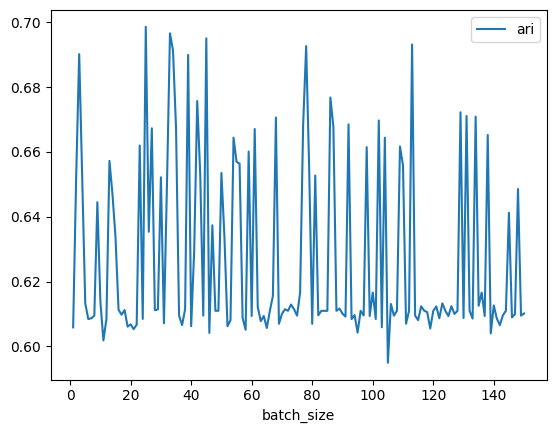

In [5]:
gridsearch_data.plot(x="batch_size", y="ari")

La zone de stabilité d'un ARI de 69 % entre 32 et 34 et remarquable.

Mais la petite taille de 3 est tout aussi intéressante, car le temps de traitement est minimal (contrairement à l'intuition qui donnerait une dégradation temps en fonction du degré de fragmentation). Avec un si petit lot, sans perte de qualité de prédiction, on se protège des risques de débordement mémoire.

In [12]:
display(gridsearch_data[gridsearch_data.ari > .66])

,batch_size,n_docs,n_sents,n_feats,n_rd_feats,ari,comb_ari,extractor_time,reductor_time,classifier_time,show_time,total_time
2,3,1050,1050,512,2,0.690194,0.690194,10.831856,4.592731,0.425219,1.614341,17.690828
22,23,1050,1050,512,2,0.661996,0.661996,11.644633,5.892233,0.630369,2.487460,20.881443
24,25,1050,1050,512,2,0.698636,0.698636,14.214567,5.922875,0.608222,2.329809,23.443447
26,27,1050,1050,512,2,0.667314,0.667314,16.824451,6.182443,0.610961,2.572794,26.483431
32,33,1050,1050,512,2,0.696605,0.696605,17.049013,5.220999,0.476936,1.896292,24.850734
33,34,1050,1050,512,2,0.691317,0.691317,23.827513,4.891660,0.484713,1.967164,31.366942
34,35,1050,1050,512,2,0.667445,0.667445,14.617519,4.952813,0.478929,2.141847,22.436479
38,39,1050,1050,512,2,0.689939,0.689939,16.323948,5.542188,0.461322,3.862784,26.416657
41,42,1050,1050,512,2,0.675719,0.675719,10.107594,4.964047,0.454171,2.029292,17.775069
44,45,1050,1050,512,2,0.695069,0.695069,23.683732,5.403247,0.463826,2.095591,31.856470


<AxesSubplot:xlabel='batch_size'>

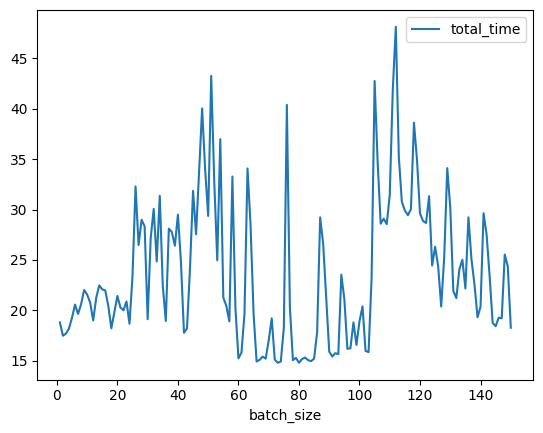

In [13]:
gridsearch_data.plot(x="batch_size", y="total_time")